# The <code class="side-menu-function-name">train_hdnnp</code> workflow

_Run this notebook directly in your browser through Binder:
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gl/runner-suite%2Frunnerase-usage-environment/main?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgitlab.com%252Frunner-suite%252Frunnerase-usage%26urlpath%3Dtree%252Frunnerase-usage%252Ftrain.ipynb%26branch%3Dmain)_

Often, one wants to train a full potential without starting every mode in a separate step. For this application, runnerase offers the `train_hdnnp` workflow which performs four tasks in an automatic, but fully controllable fashion:

1. Filter the dataset
2. Generate symmetry functions
3. Run modes 1, 2, 3
4. For each mode, generate plots and analysis output

## General setup

In [1]:
from runnerase.calculators.runner import Runner
from ase.io import read
from runnerase.workflows import train_hdnnp
from runnerase.utils import DEFAULT_TRAINING_PARAMETERS

All the setup we need is to create a calculator, containing a training dataset, a command, and a label (optional, but recommended).

In [2]:
RUNNER_CMD = 'runner1 > PREFIX.out'
calc = Runner(
    command=RUNNER_CMD,
    dataset=read('data/input.data', index=':', format='runnerdata'),
    label='fit_1/mode1/mode1'
)

## Control settings for each training stage

All settings are controlled via a single dictionary. It must contain five keys: `symfuns`, `filter`, `mode1`, `mode2` and `mode3`, each with its own requirements. Therefore, it is recommended to start by loading the `DEFAULT_TRAINING_PARAMETERS` dictionary provided by runnerase and then modifying the keywords from there.

In [3]:
settings = DEFAULT_TRAINING_PARAMETERS.copy()
settings

{'symfuns': {'radial': {'algorithm': 'turn', 'amount': 5, 'cutoff': 12.0},
  'angular': {'algorithm': 'literature', 'amount': 4, 'cutoff': 12.0}},
 'filter': {'function': <function runnerase.utils.atoms.default_filter_function(atoms: ase.atoms.Atoms, cutoff: float, upper_boundary_max_force: float = 50.0, upper_boundary_energy_per_atom: float = 0.0, upper_boundary_volume_per_atom: float = 30.0) -> bool>,
  'kwargs': {'cutoff': 12.0}},
 'mode1': {'runner_mode': 1},
 'mode2': {'runner_mode': 2},
 'mode3': {'runner_mode': 3}}

runnerase chooses basic defaults for the number and type of symmetry functions and also provides a simple filtering function that should be applicable to a wide range of datasets.

We can modify this dictionary to our liking, for example by reducing the number of training epochs:

In [4]:
settings['mode2']['epochs'] = 30

## Training the potential

All that is left is to train:

Mode 1: No. Structures:   0%|          | 0/100 [00:00<?, ?it/s]

Mode 2: No. Epochs: 100%|██████████| 30/30 [02:37<00:00,  5.24s/it]


Epoch | RMSE(E) / eV/atom  | RMSE(F) / eV/Bohr  |
      |  Train   |  Test   |  Train   |  Test   |
-------------------------------------------------
    0 |  0.0099  |  0.0100 |  0.4688  |  0.4693 |
    1 |  0.0069  |  0.0082 |  0.2970  |  0.3011 |
    2 |  0.0082  |  0.0061 |  0.2039  |  0.2049 |
    3 |  0.0066  |  0.0070 |  0.1635  |  0.1617 |
    4 |  0.0044  |  0.0045 |  0.1526  |  0.1508 | <- Best Epoch according to RuNNer
    5 |  0.0036  |  0.0045 |  0.1532  |  0.1492 |
    6 |  0.0025  |  0.0055 |  0.1460  |  0.1430 |
    7 |  0.0017  |  0.0048 |  0.1432  |  0.1401 |
    8 |  0.0018  |  0.0047 |  0.1409  |  0.1377 |
    9 |  0.0012  |  0.0051 |  0.1389  |  0.1349 |
   10 |  0.0011  |  0.0052 |  0.1369  |  0.1329 |
   11 |  0.0008  |  0.0051 |  0.1361  |  0.1322 |
   12 |  0.0008  |  0.0051 |  0.1345  |  0.1306 |
   13 |  0.0007  |  0.0051 |  0.1340  |  0.1306 |
   14 |  0.0007  |  0.0048 |  0.1331  |  0.1299 |
   15 |  0.0006  |  0.0047 |  0.1327  |  0.1293 |
   16 |  0.0006 

Mode 3: No. Structures: 100%|██████████| 100/100 [00:07<00:00, 13.95it/s]


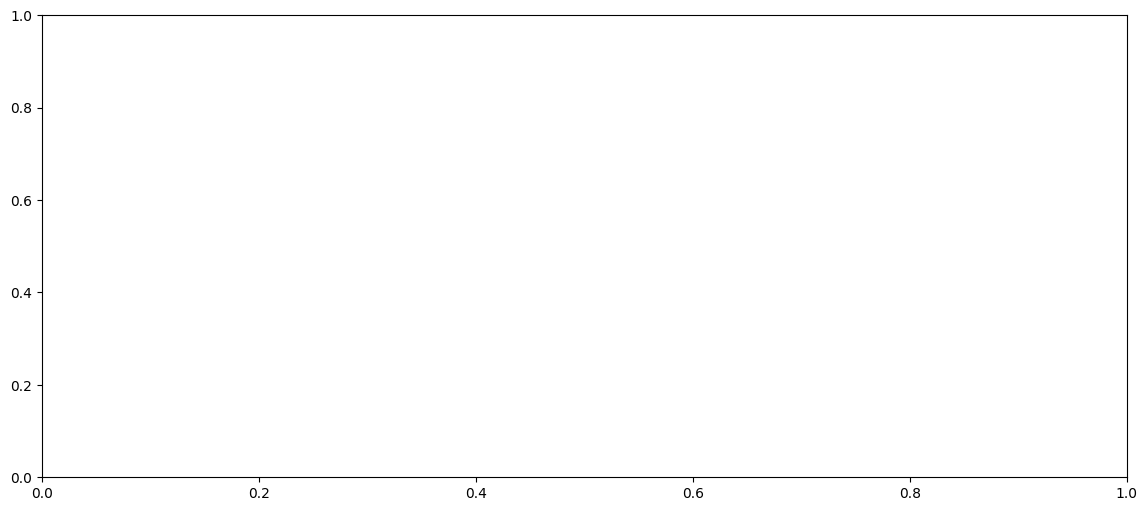

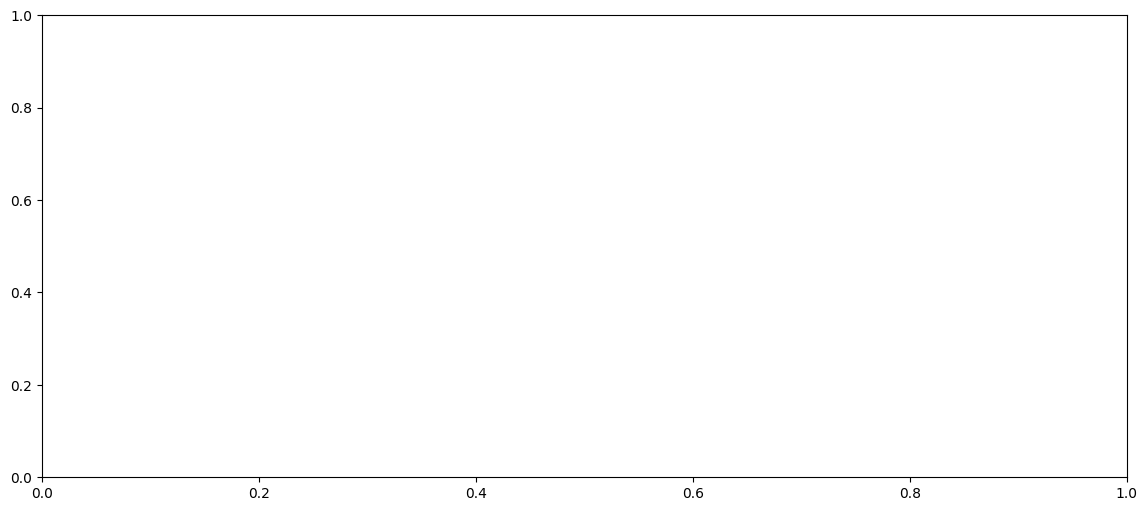

In [5]:
train_hdnnp(calc, settings)

After the calculation has finished, you will find that the potential has been fully trained and some interesting plots about the fit have been generated. 

In [6]:
print(calc)
calc.results.keys()

Runner(n_structures=100, trained=True)


dict_keys(['sfvalues', 'splittraintest', 'fitresults', 'weights', 'scaling', 'energy', 'forces', 'stress'])

<div class="admonition tip">
    <p class="admonition-title">Queue Submission</p>
    <p>
        Of course, `train_hdnnp` can also be submitted to the queue using `runnerase.utils.submit.submit_slurm`.
    </p>
</div>